# HW2

by Handan Cetin | USCID: 6074572947 | github: handancetin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.neighbors as skN
import sklearn.metrics as skM
import sklearn.preprocessing as skP
import sklearn.linear_model as skLM
import statsmodels.api as smA
import statsmodels.formula.api as smF

import random
random.seed(1234) # for reproducibility

import warnings
warnings.filterwarnings('ignore') # for plots

## 1. Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

### 1.(a) Download the Combined Cycle Power Plant data1 from
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
# Read the data
filepath = '../data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(filepath, sheet_name='Sheet1', header = 0)

### 1.(b) Exploring the data

#### 1.(b)i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print('There are', df.shape[0],'rows and', df.shape[1], 'columns in the data set.')
df

There are 9568 rows and 5 columns in the data set.


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


The datapoints in the data set are collected from the Combined Cycle Power Plant (CCPP) over 6 years (2006-2011). Columns, or features, represent:
* Temperature (AT), 
* Exhaust Vacuum (V),  
* Ambient Pressure (AP), 
* Relative Humidity (RH), and 
* The net (hourly) Electrical Energy Output (PE) 

of the plant. The datapoints are collected when the CCPP was working with full load.

#### 1.(b)ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

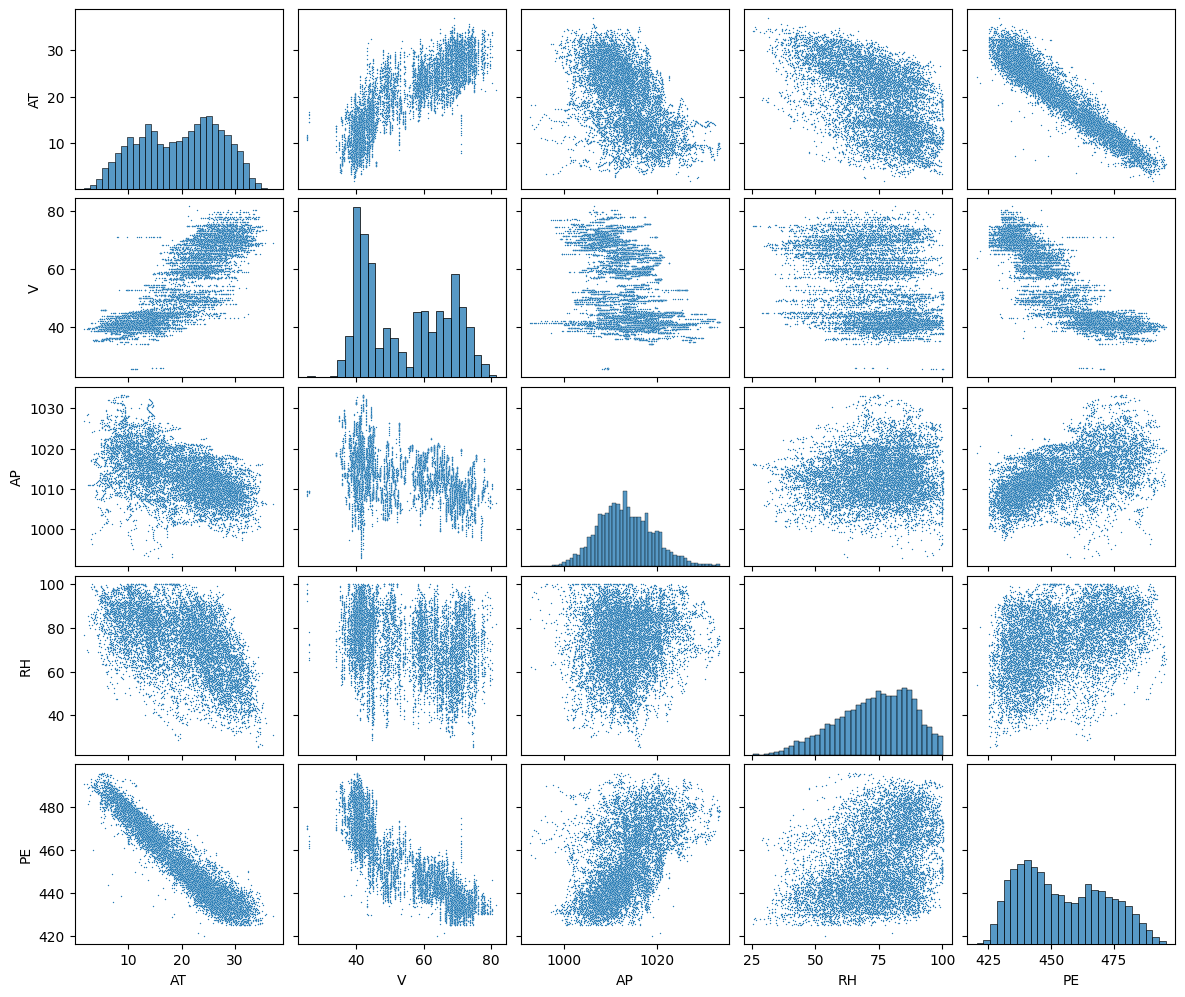

In [4]:
p = sns.pairplot(df, kind='scatter', grid_kws={"despine": False}, plot_kws={"s": 1})
p.fig.set_size_inches(12,10) 

In the above pairwise scatterplots, it can be observed that:
* Distributions of each feature are distinct: 
* *  Temperature (AT), Exhaust Vacuum (V) and Energy Output (PE) shows bimodal distributions.
* *  Relative Humidity (RH) has a left-skewed distribution.
* *  Ambient Pressure (AP) looks normal.
* Electrical Energy Output (PE) is negatively correlated with Temperature (AT) and Exhaust Vacuum (V).
* Temperature (AT) and Exhaust Vacuum (V) are positively correlated. 


#### 1.(b)ii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### 1.(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

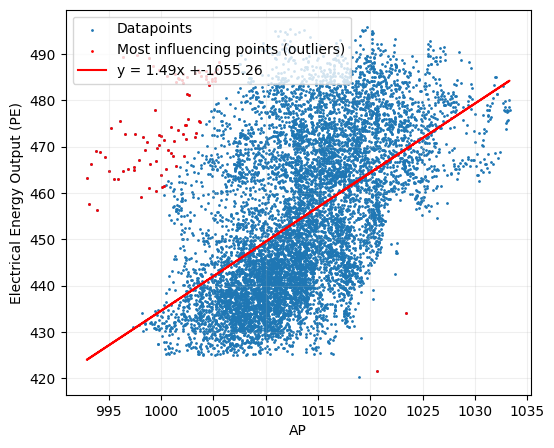

                     Linear Regression Summary Table (AP)                     
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
No. Observations:                9568   F-statistic:                     3516.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.000       1.407       1.573
Intercept  -1055.2610     25.459    -41.449      0.000   -1139.062    -971.460

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


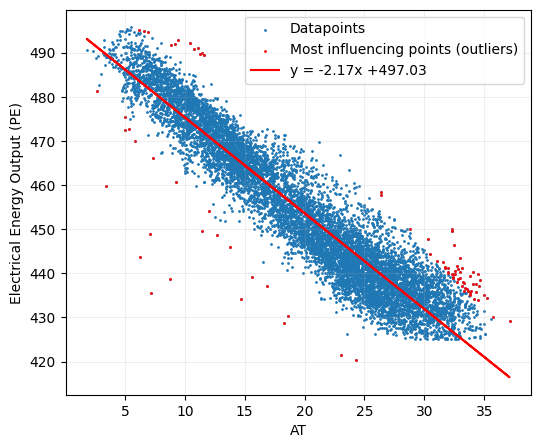

                     Linear Regression Summary Table (AT)                     
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
No. Observations:                9568   F-statistic:                 8.510e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.000      -2.196      -2.147
Intercept    497.0341      0.156   3177.280      0.000     496.519     497.549

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


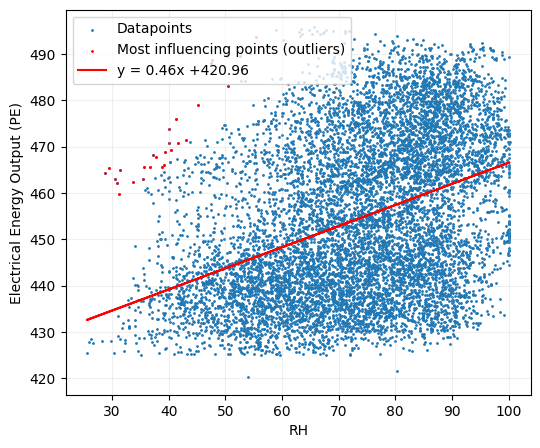

                     Linear Regression Summary Table (RH)                     
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
No. Observations:                9568   F-statistic:                     1714.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.000       0.419       0.492
Intercept    420.9618      0.823    511.676      0.000     418.254     423.670

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


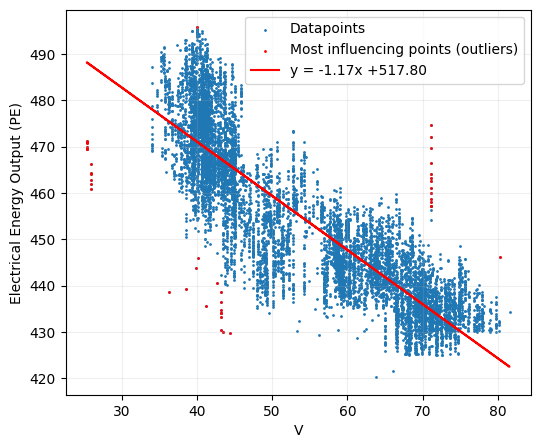

                     Linear Regression Summary Table (V)                      
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
No. Observations:                9568   F-statistic:                 2.972e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.000      -1.190      -1.146
Intercept    517.8015      0.378   1370.218      0.000     516.558     519.045

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


In [6]:
# I will use statsmodels to perform linear regression
# https://www.statsmodels.org/stable/regression.html
coefficients  = [] 
y = df['PE'].to_numpy()
for i in df.columns.difference(['PE']):
    # Data
    x = df[i].to_numpy()
    x_constant = smA.add_constant(x, prepend = False) 

    # Linear Regression
    linRegModel = smA.OLS(y, x_constant).fit()
    coefficient = linRegModel.params[0]
    intercept = linRegModel.params[1]


    # Check if there are outliers: https://en.wikipedia.org/wiki/Cook%27s_distance
    distance = linRegModel.get_influence().cooks_distance
    outliers = np.where(distance[0] > 0.001) # threshold is arbitrarily selected

    # Plot the regression line
    plt.figure(figsize = (6, 5))
    plt.scatter(x, y, s = 1, label = 'Datapoints')
    plt.scatter(x[outliers], y[outliers],  s = 1, color = 'red', label = "Most influencing points (outliers)")
    plt.plot(x, linRegModel.predict(x_constant), color = 'red', 
                label = 'y = '+ '%0.2f' % coefficient + 'x +'+ '%0.2f' % intercept)
    plt.gca().set_xlabel(i)
    plt.gca().set_ylabel('Electrical Energy Output (PE)')
    plt.grid(alpha = 0.2)
    plt.legend()
    plt.show()

    # Print the summary table
    print(linRegModel.summary(title='Linear Regression Summary Table (' + i + ')', 
                              yname = 'PE', xname = [i, 'Intercept'],
                              alpha = 0.001, slim = True))
    
    # Save the coefficients for 1.(e)
    coefficients.append(coefficient)

It can be seen from the below figures and tables, Temperature (AT) has the biggest R-squared value (R² = 0.899) followed by Exhaust Vacuum (V) (R² = 0.756). As this value is the measurement of how much of the Electrical Energy Output (PE) is explained by changes in our dependent variables (AT, V, AP, and RH), we can say that Temperature (AT) is the most effective feature. 

In terms of significance, all the p values are very small, indicating that the coefficients we calculated are NOT due to luck for all the predictors.

### 1.(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [7]:
names = df.columns.difference(['PE']).values
names = np.insert( names, len(names), 'Intercept' )

y = df['PE'].to_numpy()
x = smA.add_constant(df[df.columns.difference(['PE'])].to_numpy(), prepend=False)

multRegModel = smA.OLS(y, x)
multRegModel = multRegModel.fit()

print(multRegModel.summary(yname = 'PE', xname = names.tolist(),
                           alpha = 0.001, slim = True))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
No. Observations:                9568   F-statistic:                 3.114e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
AP             0.0621      0.009      6.564      0.000       0.031       0.093
AT            -1.9775      0.015   -129.342      0.000      -2.028      -1.927
RH            -0.1581      0.004    -37.918      0.000      -0.172      -0.144
V             -0.2339      0.007    -32.122      0.000      -0.258      -0.210
Intercept    454.6093      9.749     46.634      0.000     422.522     486.697

Notes:
[1] Standard Errors assume that the covarian

In the multiple regression model, in the table above, we see that all of the variables effects are significant (p < 0.001). We can reject the null hypothesis. The coefficients are in the range of -1.98 and 0.06. We can say that AT has the biggest impact on predicting the PE value, followed by V, RH and AP, in order. Interesetingly, in the individual linear regression models, we observed that RH's coefficient was 0.46 and now it is -0.16 in the multiple regression model. The sign change (from positive correlation to negative correlation) may mean that further investigation might be needed as our variables may have collinearity. 

### 1.(e) How do your results from 1c compare to your results from 1d? 
Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

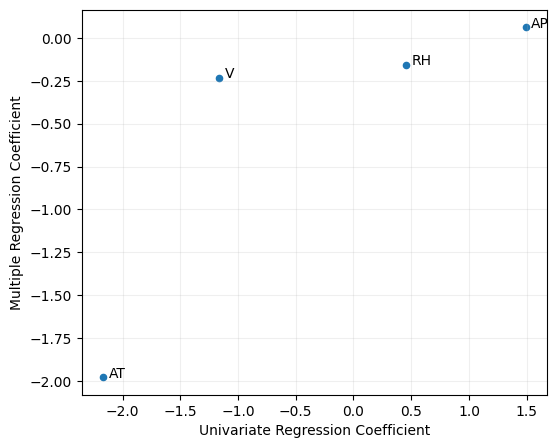

In [8]:
# Plot coefficients for each variable
plt.figure(figsize = (6, 5))
plt.scatter(coefficients, multRegModel.params[:-1], s = 20)    
plt.gca().set_xlabel('Univariate Regression Coefficient')
plt.gca().set_ylabel('Multiple Regression Coefficient')
plt.grid(alpha = 0.2)
for i, txt in enumerate(df.columns.difference(['PE']).values):
    plt.annotate(txt, (coefficients[i]+0.05, multRegModel.params[:-1][i]))

### 1.(f) Is there evidence of nonlinear association between any of the predictors and the response? 
To answer this question, for each predictor X, fit a model of the form: Y = β_0 + β_1 X + β_2 X_2 + β_3 X_3 + ε

Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [9]:
y = df['PE'].to_numpy()
for i in df.columns.difference(['PE']):
    # Data
    x = df[i].to_numpy().reshape(-1, 1)
    polyFeats = skP.PolynomialFeatures(degree = 3)
    x_FitTrns = polyFeats.fit_transform(x)
    polyModel = smA.OLS(y, x_FitTrns).fit()
    print(polyModel.summary(title='3rd Degree Polynomial Model Summary for ' + i, slim = True, alpha = 0.001))
    print('\n\n\n')

                  3rd Degree Polynomial Model Summary for AP                  
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
No. Observations:                9568   F-statistic:                     1813.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.045       0.104
x1            25.2556      3.001      8.415      0.000      15.377      35.135
x2            -0.0500      0.006     -8.439      0.000      -0.069      -0.030
x3          2.514e-05   2.92e-06      8.613      0.000    1.55e-05    3.47e-05

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

All the coefficients are significant (p < 0.001) except for Exhaust Vacuum (V) where it fails to reject the null hypothesis (for the terms x^2 and x^3). This means that the non-linear association is due to chance, not significant for this feature.


### 1.(g) Is there evidence of association of interactions of predictors with the response? 
To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [10]:
# Source: https://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html
pairs = 'PE ~ AP + AT + RH + V + AP*AT + AP*RH + AP*RH + AP*V + AT*RH + AT*RH + AT*V + RH*V'
model = smF.ols(formula = pairs, data = df).fit()
print(model.summary(slim = True, alpha = 0.001))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
No. Observations:                9568   F-statistic:                 1.405e+04
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                 coef    std err          t      P>|t|     [0.0005     0.9995]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     426.935     944.630
AP            -0.1524      0.077     -1.983      0.047      -0.405       0.100
AT            -4.3470      2.373     -1.832      0.067     -12.158       3.464
RH             1.5709      0.773      2.031      0.042      -0.975       4.116
V             -7.6749      1.351     -5.682      0.000     -12.121      -3.229
AP:AT          0.0018      0.002      0.752      0.4

In the linear model with pairwise interactions, we can say that the features V, AP:V, AT:V, and AT:RH are statistically significant, we can reject the null hypothesis for those features. For the remaining, if we consider our significance level at <0.05, we can say that AP, RH, and their interaction AP:RH features are also significant. However, none of these features pass if our significance level was < 0.01. The features AT and AP:AT are not significant, we fail to reject null hyphothesis.

### 1.(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [11]:
# Randomly select 70% 
indices = [i for i in range(0, len(df))]
selected = random.sample(indices, np.floor(len(df) * 0.7).astype(int))
remaining = set(indices) - set(selected)

trainingSet = df.iloc[list(selected), :]
testingSet  = df.iloc[list(remaining), :]

# Define X and Y, features and target values
trainingFeatures = trainingSet.drop('PE', axis = 1)
trainingTarget   = trainingSet['PE']
testingFeatures = testingSet.drop('PE', axis = 1)
testingTarget   = testingSet['PE']

In [12]:
# all possible interaction terms and quadratic nonlinearities
interactions = 'PE ~ AP + AT + RH + V + np.power(AP, 2) + np.power(AT, 2) + np.power(RH, 2) + np.power(V, 2) + AP*AT + AP*RH + AP*RH + AP*V + AT*RH + AT*RH + AT*V + RH*V'

interAllModel = smF.ols(formula = interactions, data = trainingSet).fit()
print(interAllModel.summary(slim = True, alpha = 0.01, title = 'Regression (with ALL interactions) Summary Report'))

trainingMSE = skM.mean_squared_error(trainingTarget, interAllModel.predict(trainingFeatures))
testingMSE  = skM.mean_squared_error(testingTarget, interAllModel.predict(testingFeatures))

              Regression (with ALL interactions) Summary Report               
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
No. Observations:                6697   F-statistic:                     6998.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                      coef    std err          t      P>|t|      [0.005      0.995]
-----------------------------------------------------------------------------------
Intercept       -7258.3802   1516.248     -4.787      0.000   -1.12e+04   -3351.668
AP                 15.0922      2.939      5.136      0.000       7.520      22.664
AT                 -5.3407      3.792     -1.408      0.159     -15.112       4.430
RH                  4.3780      1.091      4.012      0.000       1.566       7.190
V                  -2.8947      1.814     -1.596      0.111      -7.568       1.779
np.power(AP, 2)  

In [13]:
print('Training MSE =', "{:.4f}".format(trainingMSE))
print('Testing MSE  =', "{:.4f}".format(testingMSE))
print('\nInsignificant variables (p-value > 0.01): AT, V, V^2, AP:AT, AP:V, RH:V')
print('Removable variables: V^2, AP:AT, AP:V, RH:V')

Training MSE = 18.6530
Testing MSE  = 16.8421

Insignificant variables (p-value > 0.01): AT, V, V^2, AP:AT, AP:V, RH:V
Removable variables: V^2, AP:AT, AP:V, RH:V


In [14]:
# all possible interaction terms and quadratic nonlinearities
interactionsSig = 'PE ~ AP + AT + RH + V + np.power(AP, 2) + np.power(AT, 2) + np.power(RH, 2) + AP*RH + AP*RH + AT*RH + AT*RH + AT*V'

interSigModel = smF.ols(formula = interactionsSig, data = trainingSet).fit()
print(interSigModel.summary(slim = True, alpha = 0.01, title = 'Regression (with ONLY significant interactions) Summary Report'))

trainingMSESig = skM.mean_squared_error(trainingTarget, interSigModel.predict(trainingFeatures))
testingMSESig  = skM.mean_squared_error(testingTarget, interSigModel.predict(testingFeatures))


        Regression (with ONLY significant interactions) Summary Report        
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
No. Observations:                6697   F-statistic:                     9784.
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
                      coef    std err          t      P>|t|      [0.005      0.995]
-----------------------------------------------------------------------------------
Intercept       -9928.5011   1135.038     -8.747      0.000   -1.29e+04   -7004.002
AP                 20.0780      2.243      8.950      0.000      14.298      25.858
AT                 -2.3925      0.105    -22.774      0.000      -2.663      -2.122
RH                  5.8448      0.795      7.353      0.000       3.797       7.893
V                  -0.4555      0.032    -14.280      0.000      -0.538      -0.373
np.power(AP, 2)  

In [15]:
print('Training MSE =', "{:.4f}".format(trainingMSESig))
print('Testing MSE  =', "{:.4f}".format(testingMSESig))
print('After removal, all the remaining variables are significant!')

Training MSE = 18.6878
Testing MSE  = 16.8856
After removal, all the remaining variables are significant!


### 1.(i) KNN Regression
#### 1.(i) i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. 
Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k

Minimum error is reached at k = 6


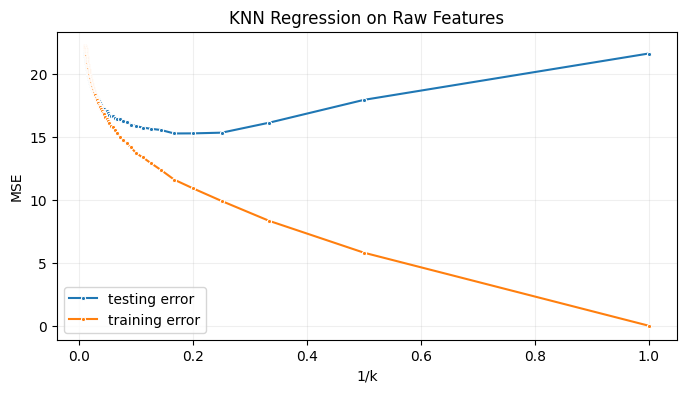

In [16]:
# RAW Data
testingErrors  = []
trainingErrors = []
kValues = []
minErrorPos = 0 

for k in range(1, 101):

    # Training step
    regressor = skN.KNeighborsRegressor(n_neighbors = k)
    regressor.fit(trainingFeatures, trainingTarget)
    
    # Prediction step
    testPredicted     = regressor.predict(testingFeatures)
    trainingPredicted = regressor.predict(trainingFeatures) 
    
    # Calculate scores (The best performance is 1)
    trainingMSE = skM.mean_squared_error(trainingTarget, trainingPredicted)
    testingMSE  = skM.mean_squared_error(testingTarget, testPredicted)

    # Create vectors for plotting
    testingErrors.append(testingMSE)
    trainingErrors.append(trainingMSE)
    kValues.append(1/k)
    
    # Keep track for the best k value with maximum score (a.k.a. minimum error)
    if testingMSE < testingErrors[minErrorPos]:
        minErrorPos = k - 1 # indices start from 0
        bestK = k

print('Minimum error is reached at k =', bestK)

plt.figure(figsize = (8, 4))
sns.lineplot(x = kValues, y = testingErrors,  marker='.', label="testing error")
sns.lineplot(x = kValues, y = trainingErrors, marker='.', label="training error")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("MSE")
plt.title("KNN Regression on Raw Features")
plt.grid(alpha = 0.2)
plt.show()



Minimum error is reached at k = 6


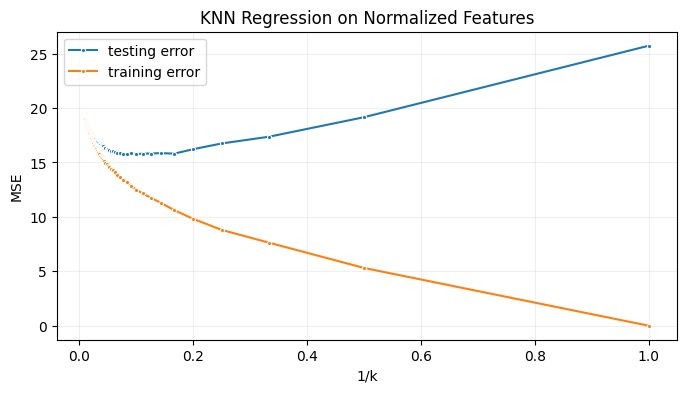

In [17]:
# Normalized Data
testingErrorsNorm  = []
trainingErrorsNorm = []
kValuesNorm = []
minErrorPosNorm = 0 

for k in range(1, 101):

    # Training step
    normalizer = skP.MinMaxScaler()
    trainingFeaturesNormalized = normalizer.fit_transform(trainingFeatures)
    testingFeaturesNormalized  = normalizer.fit_transform(testingFeatures)
    regressor = skN.KNeighborsRegressor(n_neighbors = k)
    regressor.fit(trainingFeaturesNormalized, trainingTarget)
    
    # Prediction step
    testPredicted     = regressor.predict(testingFeaturesNormalized)
    trainingPredicted = regressor.predict(trainingFeaturesNormalized) 
    
    # Calculate scores (The best performance is 1)
    trainingMSE = skM.mean_squared_error(trainingTarget, trainingPredicted)
    testingMSE  = skM.mean_squared_error(testingTarget, testPredicted)

    # Create vectors for plotting
    testingErrorsNorm.append(testingMSE)
    trainingErrorsNorm.append(trainingMSE)
    kValuesNorm.append(1/k)
    
    # Keep track for the best k value with maximum score (a.k.a. minimum error)
    if testingMSE < testingErrors[minErrorPosNorm]:
        minErrorPosNorm = k - 1 # indices start from 0
        bestK = k

print('Minimum error is reached at k =', bestK)

plt.figure(figsize = (8, 4))
sns.lineplot(x = kValuesNorm, y = testingErrorsNorm,  marker='.', label="testing error")
sns.lineplot(x = kValuesNorm, y = trainingErrorsNorm, marker='.', label="training error")
plt.gca().set_xlabel("1/k")
plt.gca().set_ylabel("MSE")
plt.title("KNN Regression on Normalized Features")
plt.grid(alpha = 0.2)
plt.show()



### 1.(j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [18]:
# Arrangement for printing table
comparisonTable = [ ["    Regression Model",       "  Training Error",                  "  Testing Error"],
                    ["Linear (all interactions)",  trainingMSE,                         testingMSE],
                    ["Linear (significants only)", trainingMSESig,                      testingMSESig],
                    ["KNN (on Raw Data)",          trainingErrors[minErrorPos],         testingErrors[minErrorPos]],
                    ["KNN (on Normalized Data)",   trainingErrorsNorm[minErrorPosNorm], testingErrorsNorm[minErrorPosNorm]]]
s = [[str(e) for e in row] for row in comparisonTable]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

    Regression Model      	  Training Error  	  Testing Error   
Linear (all interactions) 	19.013706939002528	18.91061773393244 
Linear (significants only)	18.68781724281829 	16.88559208940959 
KNN (on Raw Data)         	11.608511806696203	15.283527093734287
KNN (on Normalized Data)  	10.615178808504634	15.810015208599419


Looking at the table above, we see that KNN gives lower errors even after the removing non-significant feature interactions from the linear regression model. 

The minimum testing error is achieved with KNN Regression model with the raw data.

## 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

* **Answer:** *If we have small number of predictors for extremely large number of sample, we would generally expect a flexible statistical learning model performing better. Since we have a large sample size, capturing complex patterns and relationships within the data would result better with a flexible model as it can adapt to the data's variability, thus achieving a lower bias.*

(b) The number of predictors p is extremely large, and the number of observations n is small.

* **Answer:** *If we have larger number of predictors with low number of observations, a flexible method would encounter overfitting problems. In this case, we would expect an inflexible method to perform better as it would simplify the model.*

(c) The relationship between the predictors and response is highly non-linear.

* **Answer:** *In this case, we would expect a flexible method to perform better since it can capture non-linear patterns by adjusting the variances in the data.*

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

* **Answer:** *If we think that high variance implies more noise in the data, a flexible model could overfit. Thus, we would expect an inflexible method to perform better in these kind of situations as it is less affected by the noise.*



## 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

|  Obs. |   X1   |   X2   |   X3  |  Y      |
|  ---    |   ---    |  ---    |  ---  |---   |   
|  1    |   0    |   3    |   0   |  Red    |   
|  2    |   2    |   0    |   0   |  Red    |
|  3    |   0    |   1    |   3   |  Red    |
|  4    |   0    |   1    |   2   |  Green  |
|  5    |   −1   |   0    |   1   |  Green  |
|  6    |   1    |   1    |   1   |  Red    |


Suppose we wish to use this data set to make a prediction for Y when X1=X2=X3=0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0.


In [19]:
x_obs  = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
x_test = [[0, 0, 0]]
distance = skM.pairwise_distances(x_obs, x_test, metric='euclidean')
print(distance)

[[3.        ]
 [2.        ]
 [3.16227766]
 [2.23606798]
 [1.41421356]
 [1.73205081]]


(b) What is our prediction with K = 1? Why?

* **Answer:** *If k = 1, we will only consider the single closest (nearest) neighbour point, that is 5th observation (with the smallest distance of 1.41). Therefore, our prediction for Y would be "Green."*

(c) What is our prediction with K = 3? Why?

* **Answer:** *If k = 3, we will consider the closest 3 neighbour points, which are 5th, 6th, and 2nd observations. Our prediction for Y would be "Red" as two of the neighbours are labeled as "Red."*

(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

* **Answer:** *If the decision boundary is highly non-linear, we would expect the best value for k to be small. Small k values are better at capturing local patterns as the number of neighbours we are looking at are lower.*